In [1]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pymssql

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   --------------- ------------------------ 0.8/2.0 MB 2.0 MB/s eta 0:00:01
   -------------------------- ------------- 1.3/2.0 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.6/2.0 MB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import pyodbc
import matplotlib.colors as mcolors
import numpy as np

In [13]:
conn = pyodbc.connect(
    "Driver={SQL Server};"
    "Server=localhost;"
    "Database=cucasDWH;"
    "Trusted_Connection=yes;"
)


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\2339059098.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


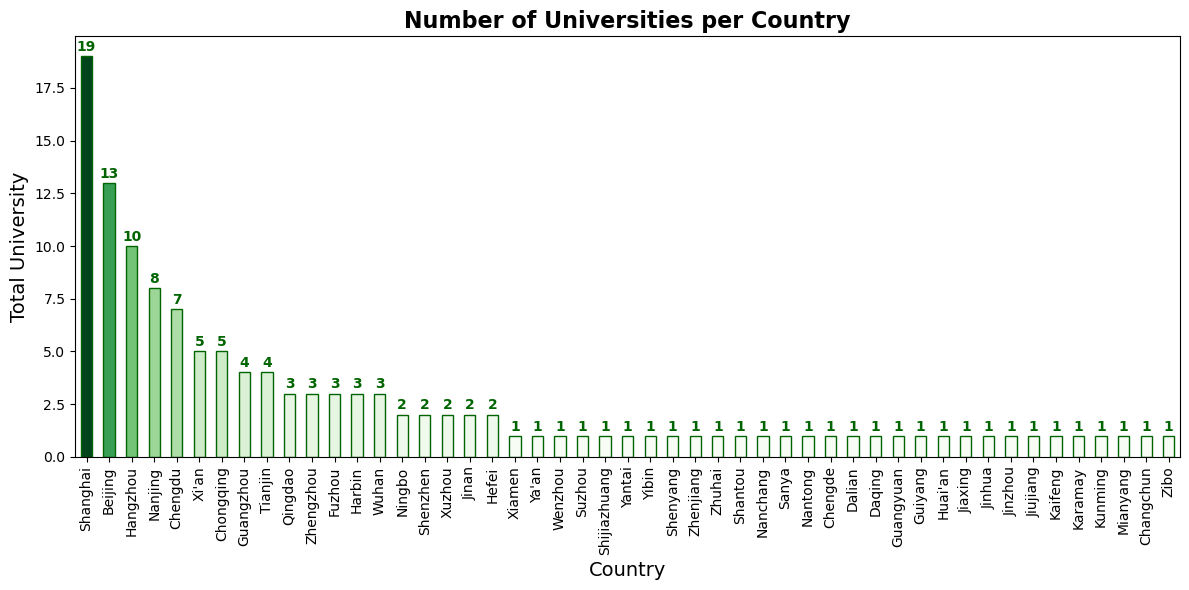

In [24]:
#####################################################################
################## number of universities per country ###############
#####################################################################
query = """
SELECT University, Location AS Country
FROM gold.ScholarshipDIM
"""

df = pd.read_sql_query(query, conn)

Uni_Count_Country = df.groupby('Country')["University"].nunique().sort_values(ascending=False)

cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Uni_Count_Country.min(), vmax=Uni_Count_Country.max())
colors = [cmap(norm(value)) for value in Uni_Count_Country]

ax = Uni_Count_Country.plot(kind='bar', color=colors, edgecolor='#006400', figsize=(12,6))

plt.title('Number of Universities per Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total University', fontsize=14)
plt.xticks(rotation=90)  
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.1),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#006400')  

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\454785654.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


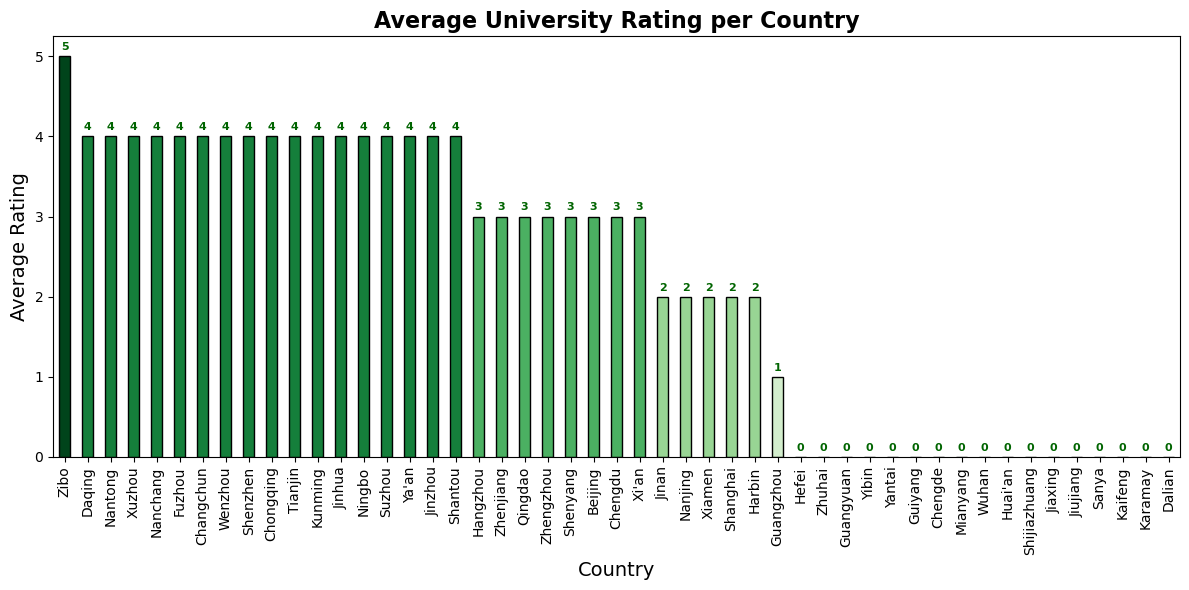

In [26]:
#####################################################################
############## average university rating per country ################
#####################################################################


query = """
SELECT University, Location AS Country, Rating
FROM gold.ScholarshipDIM
WHERE Rating IS NOT NULL
"""

df = pd.read_sql_query(query, conn)


Avg_Rating_Country = df.groupby('Country')["Rating"].mean().sort_values(ascending=False)
Avg_Rating_Country = Avg_Rating_Country.astype(int) 


cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Avg_Rating_Country.min(), vmax=Avg_Rating_Country.max())
colors = [cmap(norm(value)) for value in Avg_Rating_Country]


ax = Avg_Rating_Country.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))

plt.title('Average University Rating per Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=90)  

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=8, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\2739079772.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


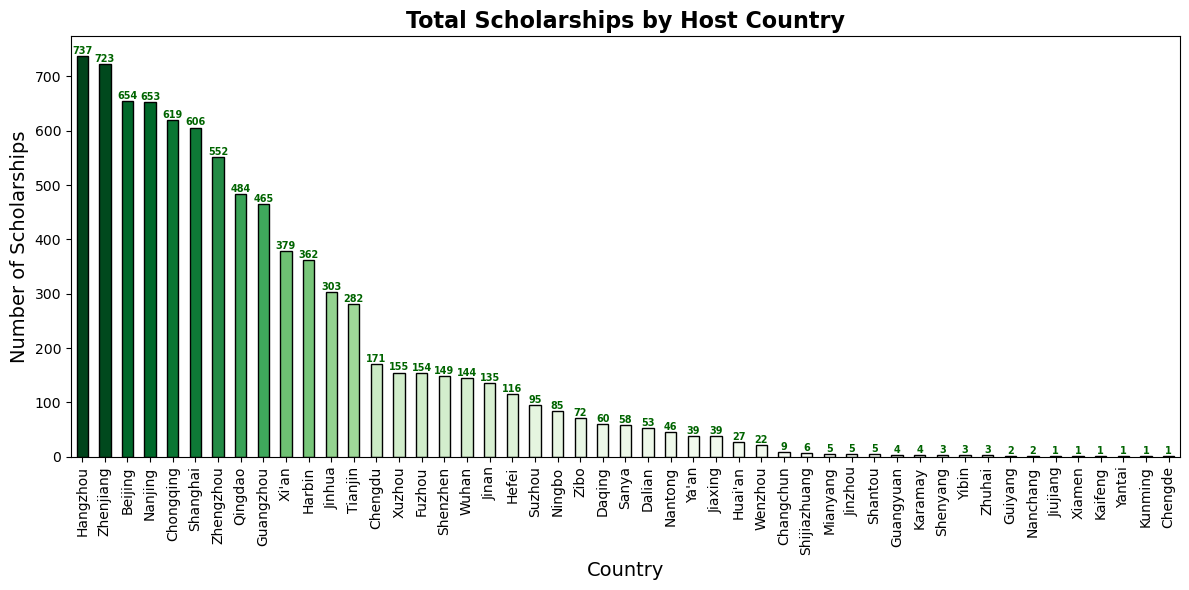

In [34]:
#####################################################################
################# Scholarships Count by Host Country ################
#####################################################################

query = """
SELECT Location AS Country, Schol_ID
FROM gold.ScholarshipDIM
"""

df = pd.read_sql_query(query, conn)


Scholarship_Count = df.groupby('Country')["Schol_ID"].nunique().sort_values(ascending=False)
cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Scholarship_Count.min(), vmax=Scholarship_Count.max())
colors = [cmap(norm(value)) for value in Scholarship_Count]

ax = Scholarship_Count.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))
plt.title('Total Scholarships by Host Country', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Scholarships', fontsize=14)
plt.xticks(rotation=90) 

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=7, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\525760783.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


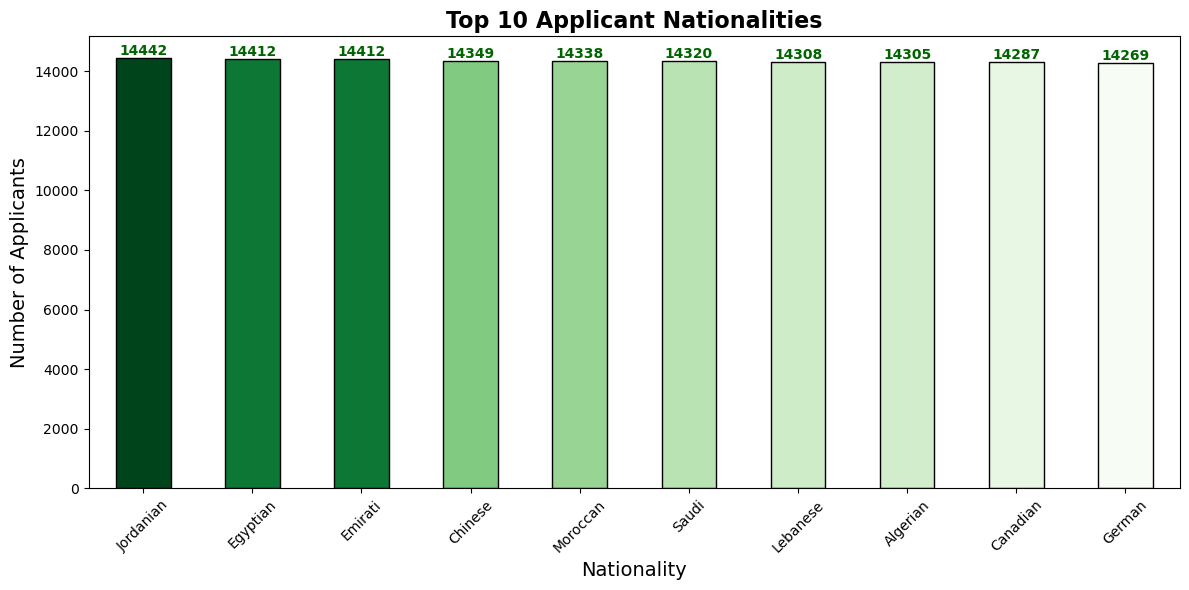

In [33]:
#####################################################################
############ top applicant nationalities (international) ############
#####################################################################

query = """
SELECT Nationality
FROM gold.ApplicantDIM
WHERE Nationality IS NOT NULL
"""

df = pd.read_sql_query(query, conn)

Top_Nationalities = df['Nationality'].value_counts().sort_values(ascending=False)

Top_Nationalities = Top_Nationalities.head(10)

cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=Top_Nationalities.min(), vmax=Top_Nationalities.max())
colors = [cmap(norm(value)) for value in Top_Nationalities]

ax = Top_Nationalities.plot(kind='bar', color=colors, edgecolor='black', figsize=(12,6))

plt.title('Top 10 Applicant Nationalities', fontsize=16, fontweight='bold')
plt.xlabel('Nationality', fontsize=14)
plt.ylabel('Number of Applicants', fontsize=14)
plt.xticks(rotation=45) 

for p in ax.patches:
    ax.annotate(f"{p.get_height()}",
                (p.get_x() + p.get_width() / 2., p.get_height() + 0.05),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='#006400')

plt.tight_layout()
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\3883080044.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


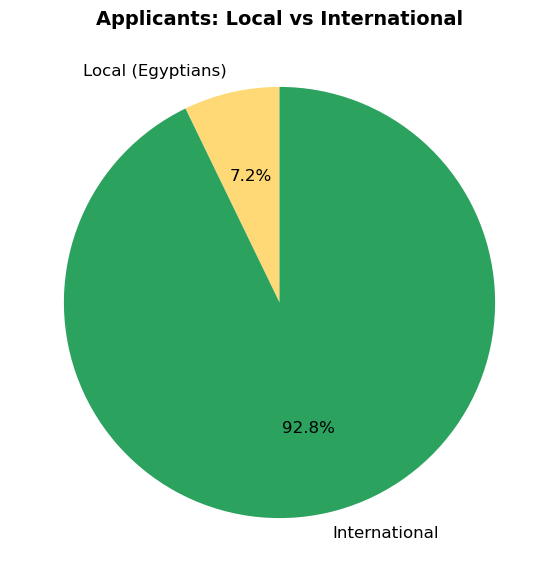

In [40]:
#####################################################################
########### local vs international ratio by host country ############
#####################################################################

query = """
SELECT A.Nationality, S.Tuition, S.ScholarshipCoverageLivingExpense
FROM Gold.ApplicationFact AF
LEFT JOIN Gold.ApplicantDIM A ON AF.ApplicantKey = A.ApplicantKey
LEFT JOIN Gold.ScholarshipDIM S ON AF.ScholarshipKey = S.ScholarshipKey
WHERE A.Nationality IS NOT NULL
"""

df = pd.read_sql_query(query, conn)
df['Tuition'] = pd.to_numeric(df['Tuition'], errors='coerce')
df['ScholarshipCoverageLivingExpense'] = pd.to_numeric(df['ScholarshipCoverageLivingExpense'], errors='coerce')
df['IsLocal'] = df['Nationality'].str.lower().str.strip().str.contains('egypt')

applicants_count = df['IsLocal'].value_counts()
counts = [applicants_count.get(True, 0), applicants_count.get(False, 0)]
labels = ['Local (Egyptians)', 'International']

df['TotalCost'] = df['Tuition'] + df['ScholarshipCoverageLivingExpense']
avg_cost_local = df[df['IsLocal']]['TotalCost'].mean()
avg_cost_intl = df[~df['IsLocal']]['TotalCost'].mean()


colors = ['#fed976','#2ca25f']

plt.figure(figsize=(7,7))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize':12})
plt.title('Applicants: Local vs International', fontsize=14, fontweight='bold')
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15984\2554436909.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


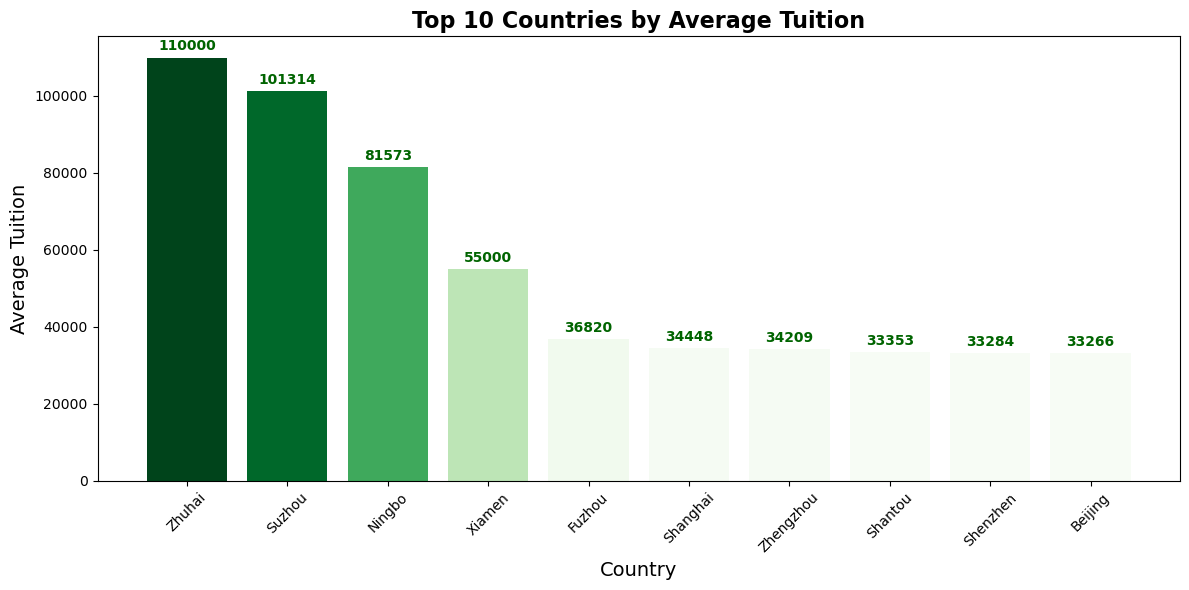

In [56]:
#####################################################################
################# Top 10 Countries by Average Tuition ###############
#####################################################################

query = """
SELECT S.Location AS Country, 
       S.Tuition
FROM Gold.ApplicationFact AF
LEFT JOIN Gold.ScholarshipDIM S ON AF.ScholarshipKey = S.ScholarshipKey
WHERE S.Location IS NOT NULL
"""

df = pd.read_sql_query(query, conn)
df['Tuition'] = pd.to_numeric(df['Tuition'], errors='coerce').fillna(0)
country_avg = df.groupby('Country')['Tuition'].mean().sort_values(ascending=False).reset_index()
top10 = country_avg.head(10)
cmap = plt.cm.Greens
norm = mcolors.Normalize(vmin=top10['Tuition'].min(), vmax=top10['Tuition'].max())
colors = [cmap(norm(x)) for x in top10['Tuition']]
fig, ax = plt.subplots(figsize=(12,6))
bars = ax.bar(top10['Country'], top10['Tuition'], color=colors)

plt.title('Top 10 Countries by Average Tuition', fontsize=16, fontweight='bold')
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Tuition', fontsize=14)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.0f}",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0,3),
                textcoords="offset points",
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                color='darkgreen')

plt.tight_layout()
plt.show()